# Aula 2: Experimentação e MVP de Modelos - Heart Disease Dataset

## Objetivos de Aprendizagem
- Realizar Análise Exploratória de Dados (EDA) completa
- Identificar e tratar anomalias, outliers e missing values
- Aplicar técnicas de preparação de dados
- Configurar e usar MLFlow para rastreamento de experimentos
- Experimentar com diferentes algoritmos e hiperparâmetros
- Comparar resultados de múltiplos experimentos
- Criar um MVP (Minimum Viable Product) de modelo

## Exercício Prático
Você trabalhará com o dataset **Heart Disease** da UCI Machine Learning Repository para prever a presença de doenças cardíacas. Este exercício enfatiza as técnicas essenciais de preparação de dados que todo cientista de dados deve dominar.

## 1. Configuração do Ambiente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Estatística
from scipy import stats

## 2. Carregamento dos Dados

### Sobre o Dataset Heart Disease

Fonte: conjunto consolidado dos quatro datasets da UCI (Cleveland, Hungarian, Switzerland e VA Long Beach), disponibilizado no Kaggle:
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data já com alguns tratamentos de texto. O dataset original por ser encontrado em: https://archive.ics.uci.edu/dataset/45/heart+disease

- Observações: 920
- Colunas: 16 (inclui metadados como id e dataset)
- Alvo original: num (0–4), onde 0 = ausência de doença e 1–4 = presença em diferentes graus
- Valores ausentes: presentes em múltiplos campos (ex.: trestbps, chol, thalch, exang, oldpeak, slope, ca, thal)

### Esquema das Variáveis (conforme Kaggle)

- id: identificador do paciente
- dataset: origem do caso (Cleveland, Hungarian, Switzerland, VA Long Beach)
- age: idade (anos)
- sex: sexo (Male/Female)
- cp: tipo de dor no peito (typical angina, atypical angina, non-anginal, asymptomatic)
- trestbps: pressão arterial em repouso (mmHg)
- chol: colesterol sérico (mg/dl)
- fbs: glicemia em jejum > 120 mg/dl (True/False)
- restecg: ECG em repouso (normal, st-t abnormality, lv hypertrophy)
- thalch: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício (True/False)
- oldpeak: depressão do ST induzida por exercício (unidades “ST depression”)
- slope: inclinação do segmento ST de pico (upsloping, flat, downsloping)
- ca: número de vasos principais coloridos por fluoroscopia (0–3)
- thal: estado talassêmico (normal, fixed defect, reversable defect)
- num: diagnóstico (0 = sem doença; 1–4 = presença)

In [3]:
# Carregar dataset do UCI Repository
path = "data/heart_disease_uci.csv"

# Carregar dados
df = pd.read_csv(path)

print(f"Shape dos dados: {df.shape}")
print(f"\nPrimeiras linhas do dataset:")
df.head(10)

Shape dos dados: (920, 16)

Primeiras linhas do dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


```markdown

O dataset carregado contém informações clínicas de pacientes para análise de doenças cardíacas. Cada linha representa um paciente, com variáveis como idade, sexo, tipo de dor no peito, pressão arterial, colesterol, resultados de exames, e o diagnóstico (coluna `num`). Algumas colunas apresentam valores ausentes, que serão tratados nas etapas seguintes. O objetivo é prever a presença de doença cardíaca a partir dessas variáveis, utilizando técnicas de análise exploratória e modelagem preditiva.
```

In [4]:
# Informações gerais sobre o dataset
print("=== INFORMAÇÕES GERAIS DO DATASET ===\n")
print(df.info())

print("\n=== ESTATÍSTICAS DESCRITIVAS ===\n")
df.describe()

=== INFORMAÇÕES GERAIS DO DATASET ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

=== ESTATÍSTICAS DESCRITIVAS ===



,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


### O que fazem `df.info()` e `df.describe()`

- `df.info()`
    - Resume a estrutura do DataFrame.
    - Mostra: número de linhas e colunas, nomes das colunas, contagem de valores não nulos por coluna (útil para identificar missing values), tipos de dados e uso de memória.
    - No contexto do dataset, ajuda a ver rapidamente onde há muitos ausentes (ex.: `ca`, `thal`, `slope`) e quais colunas são numéricas vs. categóricas para orientar o pré-processamento.

- `df.describe()`
    - Calcula estatísticas descritivas para colunas numéricas por padrão.
    - Mostra: `count`, `mean`, `std`, `min`, `25%`, `50%` (mediana), `75%`, `max`.
    - Útil para entender escala, dispersão e possíveis outliers (ex.: valores extremos em `chol`, `trestbps`, `oldpeak`).
    - Dica: para estatísticas de colunas categóricas (como `sex`, `cp`, `thal`), use `df.describe(include='object')` ou `df.describe(include='all')` para obter `count`, `unique`, `top` e `freq`.

## 3. Análise Exploratória de Dados (EDA)

### 3.1 Análise de Missing Values

**Objetivo:** Identificar valores ausentes e entender seu padrão de distribuição

=== ANÁLISE DE MISSING VALUES ===

            Coluna  Missing_Count  Missing_Percentage
ca              ca            611               66.41
thal          thal            486               52.83
slope        slope            309               33.59
fbs            fbs             90                9.78
oldpeak    oldpeak             62                6.74
trestbps  trestbps             59                6.41
thalch      thalch             55                5.98
exang        exang             55                5.98
chol          chol             30                3.26
restecg    restecg              2                0.22


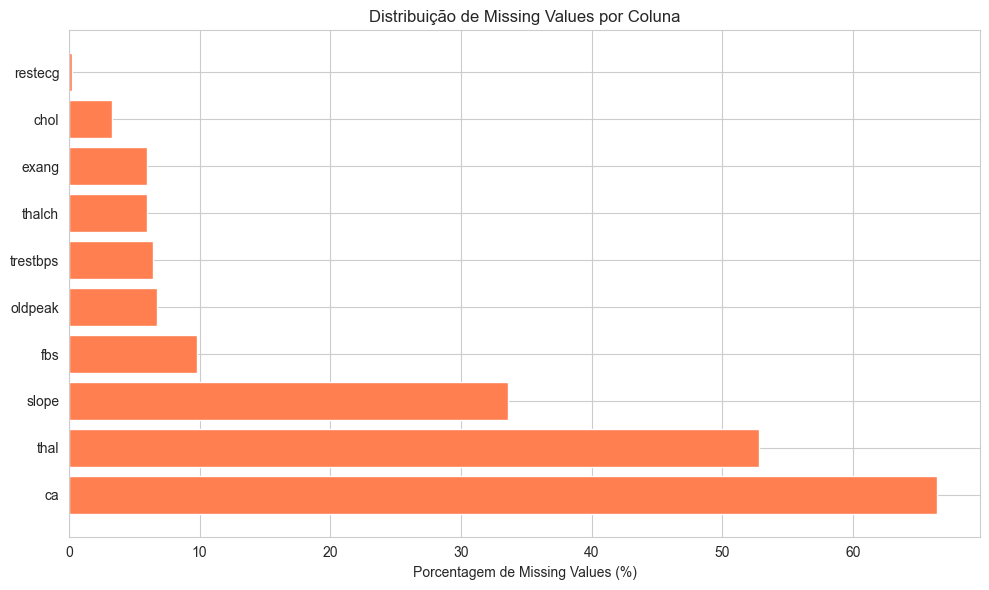

In [13]:
# Análise de valores ausentes
print("=== ANÁLISE DE MISSING VALUES ===\n")

missing_values = pd.DataFrame({
    'Coluna': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

missing_values = missing_values[missing_values['Missing_Count'] > 0].sort_values(
    by='Missing_Percentage', ascending=False
)

if len(missing_values) > 0:
    print(missing_values)
    
    # Visualizar missing values
    plt.figure(figsize=(10, 6))
    plt.barh(missing_values['Coluna'], missing_values['Missing_Percentage'], color='coral')
    plt.xlabel('Porcentagem de Missing Values (%)')
    plt.title('Distribuição de Missing Values por Coluna')
    plt.tight_layout()
    plt.show()
else:
    print("Nenhum missing value detectado!")

### 3.2 Análise da Variável Target

**Objetivo:** Entender a distribuição da variável alvo (balanceamento de classes)

=== DISTRIBUIÇÃO DA VARIÁVEL TARGET ===

Contagem:
target
1    509
0    411
Name: count, dtype: int64

Percentual:
Com doença (1): 55.33%
Sem doença (0): 44.67%


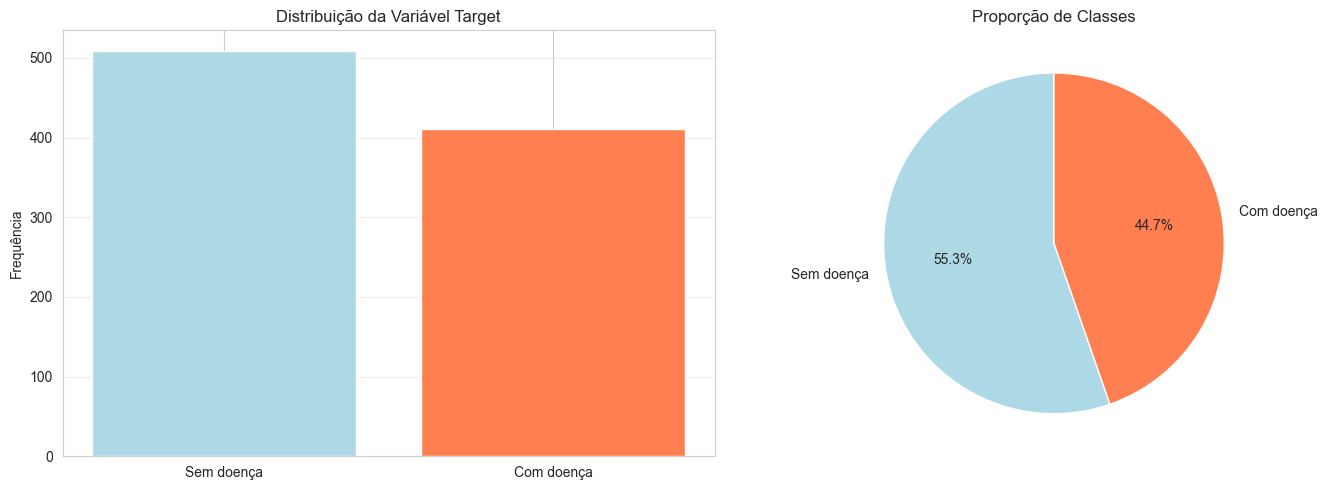


Ratio de balanceamento: 0.81
✓ Dataset razoavelmente balanceado.


In [14]:
# Renomear variável `num` para `target`
df.rename(columns={'num': 'target'}, inplace=True)

# Converter target para binário (0 = sem doença, 1 = com doença)
# No dataset original, valores > 0 indicam presença de doença
df['target'] = (df['target'] > 0).astype(int)

print("=== DISTRIBUIÇÃO DA VARIÁVEL TARGET ===\n")
target_counts = df['target'].value_counts()
target_percentages = df['target'].value_counts(normalize=True) * 100

print("Contagem:")
print(target_counts)
print("\nPercentual:")
for idx, pct in target_percentages.items():
    label = "Sem doença" if idx == 0 else "Com doença"
    print(f"{label} ({idx}): {pct:.2f}%")

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
axes[0].bar(['Sem doença', 'Com doença'], target_counts.values, color=['lightblue', 'coral'])
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição da Variável Target')
axes[0].grid(axis='y', alpha=0.3)

# Gráfico de pizza
axes[1].pie(target_counts.values, labels=['Sem doença', 'Com doença'], 
            autopct='%1.1f%%', colors=['lightblue', 'coral'], startangle=90)
axes[1].set_title('Proporção de Classes')

plt.tight_layout()
plt.show()

# Verificar se há desbalanceamento
ratio = target_counts.min() / target_counts.max()
print(f"\nRatio de balanceamento: {ratio:.2f}")
if ratio < 0.5:
    print("⚠️ Dataset desbalanceado! Considere usar técnicas como SMOTE ou class_weight.")
else:
    print("✓ Dataset razoavelmente balanceado.")

A variável alvo (target) indica se há presença (1) ou ausência (0) de doença cardíaca. Na visualização, vemos 509 casos “com doença” (55,3%) e 411 “sem doença” (44,7%), o que mostra uma leve predominância da classe positiva; o ratio entre as classes é de aproximadamente 0,81, indicando um desbalanceamento pequeno. Isso significa que podemos seguir com modelos base sem grandes ajustes, mas é importante acompanhar métricas além da acurácia, como F1, precisão e recall, e observar a matriz de confusão para entender os erros. Para manter a proporção das classes nas amostras, use divisão estratificada; se necessário, técnicas como class_weight ou SMOTE podem ser testadas, embora aqui sejam opcionais.

### 3.3 Análise de Outliers

**Objetivo:** Identificar valores extremos que podem ser erros de medição ou casos especiais

**Métodos utilizados:**
- **Z-Score**: Identifica valores que estão a mais de 3 desvios padrão da média
- **Visualização**: Boxplots para identificação visual

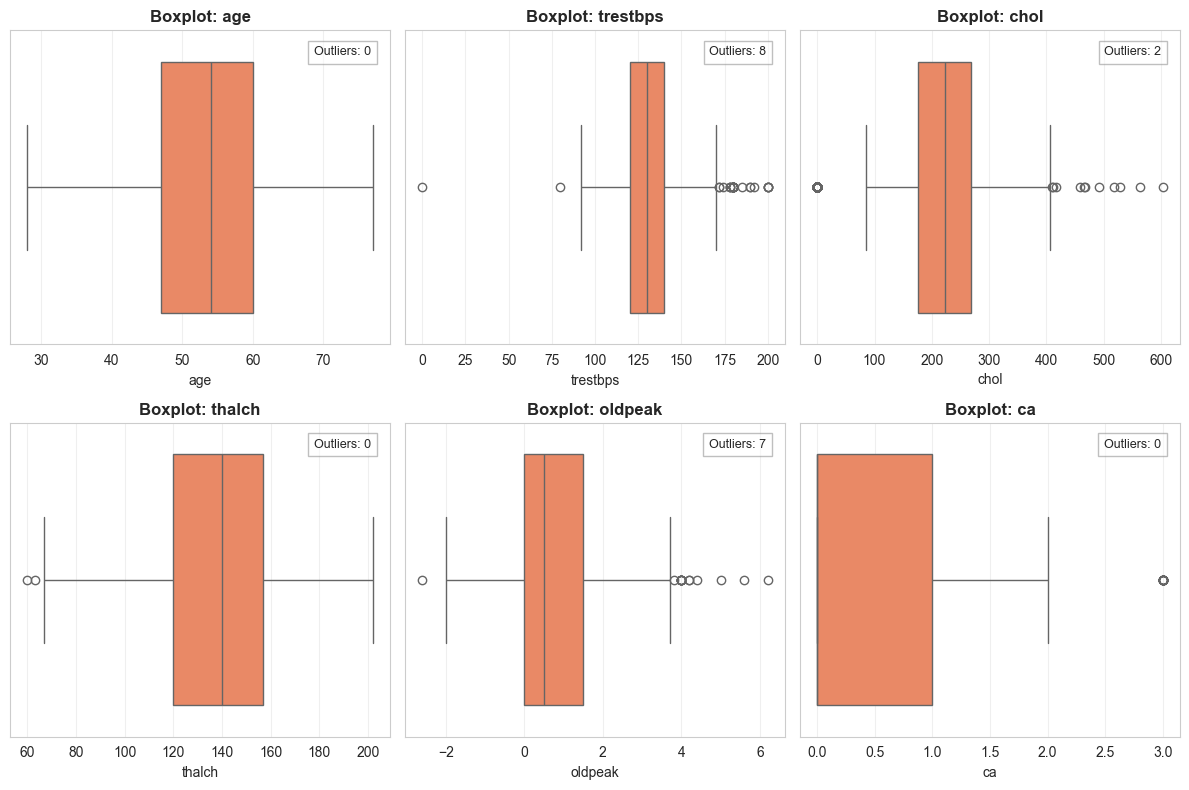

In [15]:
# Colunas numéricas (excluindo id e target)
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop(['id', 'target'])

n = len(numeric_cols)
ncols = 3
nrows = int(np.ceil(n / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[idx], color='coral')
    axes[idx].set_title(f'Boxplot: {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].grid(axis='x', alpha=0.3)
    col_zscore = np.abs(stats.zscore(df[col].dropna()))
    outlier_count = (col_zscore > 3).sum()
    axes[idx].text(0.95, 0.95, f'Outliers: {outlier_count}', 
                   transform=axes[idx].transAxes, fontsize=9,
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))

for ax in axes[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


### Interpretação dos Resultados: Outliers via Z-Score e Boxplot
- **Boxplot:** Permite visualizar rapidamente valores extremos em cada variável. Outliers aparecem como pontos fora dos limites do gráfico.
- **Z-Score:** Mede o quão distante cada valor está da média. Valores com z-score > 3 são considerados outliers estatísticos.

**Resultados:**  
A maioria das variáveis apresenta poucos outliers, tanto pelo boxplot quanto pelo z-score. Por exemplo, `ca` não possui outliers estatísticos (z-score > 3) e o boxplot não mostra pontos extremos.

**Conclusão:**  
Os dados estão bem distribuídos, com poucos outliers em `trestbps` e `oldpeak`. Técnicas simples como capping são suficientes para tratamento, sem necessidade de remoção agressiva.


### 3.4 Análise de Anomalias e Valores Inválidos

**Objetivo:** Identificar valores que não fazem sentido no contexto médico/clínico

In [16]:
print("=== ANÁLISE DE ANOMALIAS E VALORES INVÁLIDOS ===\n")

# Verificações de consistência baseadas em conhecimento de domínio
anomalies = []

# 1. Idade (deve estar entre 0 e 120)
age_anomalies = df[(df['age'] < 0) | (df['age'] > 120)]
if len(age_anomalies) > 0:
    anomalies.append(f"Idade fora do intervalo válido: {len(age_anomalies)} casos")
    
# 2. Pressão arterial (trestbps) - valores típicos: 80-200 mmHg
bp_anomalies = df[(df['trestbps'] < 80) | (df['trestbps'] > 200)]
if len(bp_anomalies) > 0:
    anomalies.append(f"Pressão arterial anormal: {len(bp_anomalies)} casos")
    print(f"⚠️ Pressão arterial anormal detectada: {len(bp_anomalies)} casos")
    print(f"   Valores: min={df['trestbps'].min()}, max={df['trestbps'].max()}")

# 3. Colesterol (chol) - valores típicos: 100-400 mg/dl
chol_anomalies = df[(df['chol'] < 100) | (df['chol'] > 400)]
if len(chol_anomalies) > 0:
    anomalies.append(f"Colesterol anormal: {len(chol_anomalies)} casos")
    print(f"⚠️ Colesterol anormal detectado: {len(chol_anomalies)} casos")
    print(f"   Valores: min={df['chol'].min()}, max={df['chol'].max()}")

# 4. Frequência cardíaca máxima (thalach) - valores típicos: 60-220 bpm
hr_anomalies = df[(df['thalach'] < 60) | (df['thalach'] > 220)]
if len(hr_anomalies) > 0:
    anomalies.append(f"Frequência cardíaca anormal: {len(hr_anomalies)} casos")
    print(f"⚠️ Frequência cardíaca anormal detectada: {len(hr_anomalies)} casos")
    print(f"   Valores: min={df['thalach'].min()}, max={df['thalach'].max()}")

# 5. Variáveis categóricas com valores fora do esperado
categorical_checks = {
    'sex': [0, 1],
    'cp': [0, 1, 2, 3],
    'fbs': [0, 1],
    'restecg': [0, 1, 2],
    'exang': [0, 1],
    'slope': [0, 1, 2],
    'ca': [0, 1, 2, 3, 4],
    'thal': [0, 1, 2, 3]
}

for col, valid_values in categorical_checks.items():
    if col in df.columns:
        invalid = df[~df[col].isin(valid_values) & df[col].notna()]
        if len(invalid) > 0:
            anomalies.append(f"{col}: {len(invalid)} valores inválidos")
            print(f"⚠️ {col}: {len(invalid)} valores fora do domínio esperado {valid_values}")

if len(anomalies) == 0:
    print("✓ Nenhuma anomalia óbvia detectada nas validações de domínio!")
else:
    print(f"\n📊 Total de tipos de anomalias detectadas: {len(anomalies)}")

# Verificar duplicatas
duplicates = df.duplicated().sum()
print(f"\n=== DUPLICATAS ===")
print(f"Registros duplicados: {duplicates}")
if duplicates > 0:
    print("⚠️ Considere remover ou investigar registros duplicados")

=== ANÁLISE DE ANOMALIAS E VALORES INVÁLIDOS ===

⚠️ Pressão arterial anormal detectada: 1 casos
   Valores: min=0.0, max=200.0
⚠️ Colesterol anormal detectado: 186 casos
   Valores: min=0.0, max=603.0


KeyError: 'thalach'

### 3.5 Análise de Distribuições

**Objetivo:** Entender a distribuição das variáveis numéricas e identificar assimetrias

In [ ]:
# Análise de distribuições
print("=== ANÁLISE DE ASSIMETRIA (SKEWNESS) E CURTOSE ===\n")

distribution_stats = []
for col in numeric_cols:
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    distribution_stats.append({
        'Coluna': col,
        'Skewness': round(skewness, 3),
        'Kurtosis': round(kurtosis, 3),
        'Interpretação': 'Normal' if abs(skewness) < 0.5 else ('Assimétrica à direita' if skewness > 0 else 'Assimétrica à esquerda')
    })

dist_df = pd.DataFrame(distribution_stats)
print(dist_df.to_string(index=False))

# Visualizar distribuições
fig, axes = plt.subplots(3, 5, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        axes[idx].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col}\nSkew: {df[col].skew():.2f}', fontsize=9, fontweight='bold')
        axes[idx].set_xlabel('Valor')
        axes[idx].set_ylabel('Frequência')
        axes[idx].grid(axis='y', alpha=0.3)

# Remover subplots vazios
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Distribuições das Variáveis Numéricas', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### 3.6 Análise de Correlações

**Objetivo:** Identificar relações entre variáveis e detectar multicolinearidade

In [ ]:
# Matriz de correlação
correlation_matrix = df.corr()

# Visualizar matriz de correlação
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Heart Disease Dataset', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identificar correlações fortes com o target
print("=== CORRELAÇÕES COM A VARIÁVEL TARGET ===\n")
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print(target_corr)

# Identificar pares de features com alta correlação (possível multicolinearidade)
print("\n=== MULTICOLINEARIDADE (Correlação entre features) ===")
print("Pares de features com correlação > 0.7:\n")

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7 and correlation_matrix.columns[i] != 'target' and correlation_matrix.columns[j] != 'target':
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlação': round(correlation_matrix.iloc[i, j], 3)
            })

if len(high_corr_pairs) > 0:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values(by='Correlação', ascending=False)
    print(high_corr_df.to_string(index=False))
    print("\n⚠️ Alta correlação entre features pode causar multicolinearidade!")
else:
    print("✓ Nenhuma correlação forte detectada entre features (excluindo target)")

## 4. Preparação dos Dados

### 4.1 Tratamento de Missing Values

**Estratégias utilizadas:**
- Para variáveis numéricas: imputação pela mediana (mais robusta a outliers)
- Para variáveis categóricas: imputação pela moda ou categoria específica
- Análise do impacto da imputação

In [19]:
print("=== TRATAMENTO DE MISSING VALUES ===\n")

# Copiar o dataframe original para preservar os dados
df_clean = df.copy()

# Imputação para variáveis numéricas: mediana
num_missing = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in num_missing:
    if col in df_clean.columns:
        median = df_clean[col].median()
        df_clean[col].fillna(median, inplace=True)
        print(f"{col}: imputado com mediana ({median:.2f})")

# Imputação para variáveis categóricas: moda
cat_missing = ['thal', 'slope', 'fbs', 'exang', 'restecg']
for col in cat_missing:
    if col in df_clean.columns:
        mode = df_clean[col].mode()[0]
        df_clean[col].fillna(mode, inplace=True)
        print(f"{col}: imputado com moda ('{mode}')")

print("\n✓ Tratamento de missing values concluído!")
print(f"Shape após imputação: {df_clean.shape}")
print("Valores ausentes restantes por coluna:")
print(df_clean.isnull().sum())

=== TRATAMENTO DE MISSING VALUES ===

trestbps: imputado com mediana (130.00)
chol: imputado com mediana (223.00)
thalch: imputado com mediana (140.00)
oldpeak: imputado com mediana (0.50)
ca: imputado com mediana (0.00)
thal: imputado com moda ('normal')
slope: imputado com moda ('flat')
fbs: imputado com moda ('False')
exang: imputado com moda ('False')
restecg: imputado com moda ('normal')

✓ Tratamento de missing values concluído!
Shape após imputação: (920, 16)
Valores ausentes restantes por coluna:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### 4.2 Codificação de Variáveis Categóricas (One-hot Encoding)

Para que algoritmos de machine learning possam trabalhar com variáveis categóricas, é necessário convertê-las em formato numérico. O método mais comum é o **One-hot Encoding**, que transforma cada categoria em uma coluna binária (0 ou 1).

**Passos:**
- Identifique as colunas categóricas relevantes (ex.: `sex`, `cp`, `restecg`, `slope`, `thal`, `dataset`).
- Aplique o `pd.get_dummies()` para criar as variáveis dummies.
- Evite a duplicidade de informação removendo uma categoria de cada variável (drop_first=True), se necessário.

**Observações:**
- O One-hot Encoding aumenta o número de colunas, mas permite que modelos interpretem corretamente as categorias.
- Após a codificação, utilize o novo dataframe (`df_encoded`) para as etapas de modelagem.

In [21]:
# Remova a coluna `dataset`
df_clean.drop(columns=['dataset'], inplace=True)

# One-hot encoding das variáveis categóricas relevantes
categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

print(f"Shape após one-hot encoding: {df_encoded.shape}")
df_encoded.head()

Shape após one-hot encoding: (920, 20)


,id,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,target,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,63,145.0,233.0,True,150.0,False,2.3,0.0,0,True,False,False,True,False,False,False,False,False,False
1,2,67,160.0,286.0,False,108.0,True,1.5,3.0,1,True,False,False,False,False,False,True,False,True,False
2,3,67,120.0,229.0,False,129.0,True,2.6,2.0,1,True,False,False,False,False,False,True,False,False,True
3,4,37,130.0,250.0,False,187.0,False,3.5,0.0,0,True,False,True,False,True,False,False,False,True,False
4,5,41,130.0,204.0,False,172.0,False,1.4,0.0,0,False,True,False,False,False,False,False,True,True,False


## 5. Experimentação e MVP (Minimum Viable Product)

### Experimento: Regressão Logística (Baseline)
Treine um modelo baseline e registre no MLFlow

In [27]:
from sklearn.model_selection import train_test_split

# Divida o dataset em features (X) e target (y)
X = df_encoded.drop(columns=['id', 'target'])
y = df_encoded['target']

# Divida em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
import mlflow
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

mlflow.set_experiment("heart_disease_classification")

with mlflow.start_run(run_name="logistic_regression_baseline"):
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)

    mlflow.log_metric("train_accuracy", train_accuracy)
    mlflow.log_metric("test_accuracy", test_accuracy)
    mlflow.log_metric("test_f1_score", test_f1)
    mlflow.log_metric("test_precision", test_precision)
    mlflow.log_metric("test_recall", test_recall)

    overfitting = train_accuracy - test_accuracy
    mlflow.log_metric("overfitting", overfitting)

    mlflow.sklearn.log_model(model, "model")

    print(f"=== LOGISTIC REGRESSION ===")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy:  {test_accuracy:.4f}")
    print(f"Test F1 Score:  {test_f1:.4f}")

    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall:    {test_recall:.4f}")
    print(f"Overfitting:    {overfitting:.4f}")

2025/11/09 15:52:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/09 15:52:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


=== LOGISTIC REGRESSION ===
Train Accuracy: 0.8247
Test Accuracy:  0.8043
Test F1 Score:  0.8302
Test Precision: 0.8544
Test Recall:    0.8073
Overfitting:    0.0204
